### Outliers

In [90]:
import pandas as pandas
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [91]:
import statistics as stats

In [92]:
# define our dataset
data = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
# outliers are 107,102, 108
data


[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 102,
 12,
 14,
 17,
 19,
 107,
 10,
 13,
 12,
 14,
 12,
 108,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

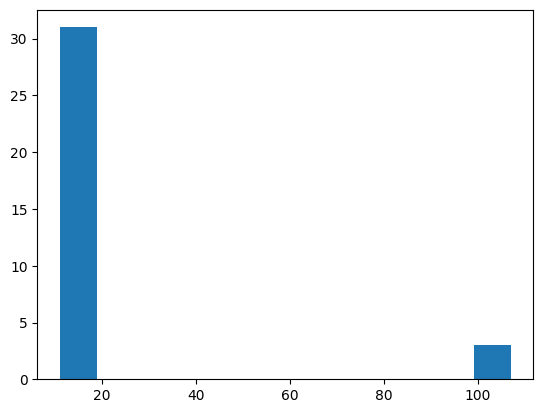

In [93]:
plt.hist(data, bins=10, rwidth=0.8)

In [94]:
outliers = []
def detect_outliers(data): # data is a list
    threshold = 3 # threshold is the number of standard deviations from the mean
    mean = np.mean(data) # mean of the data
    std = np.std(data) # standard deviation of the data
    
    for i in data: # iterate through the data
        z_score = (i-mean)/std # calculate the z-score
        if np.abs(z_score) > threshold: # if the z-score is greater than the threshold
            outliers.append(i) # add the data point to the outliers list
    return outliers # return the outliers list

In [95]:
detect_outliers(data)

[102, 107, 108]

## IQR - Inter Quartile Range
1. Sort the data
2. Calculate Q1 (25%)
3. Calculate Q3 (75%)
4. Calculate IQR (Q3-Q1)
5. Find the Lower Fence --> L.F = Q1 - 1.5(IQR)
6. Find the Upper Fence --> U.F = Q3 + 1.5(IQR)

In [96]:
# 1. sort the data
data = sorted(data)
data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [97]:
# 2,3 calculate the 1st and 3rd quartile
q1, q3 = np.percentile(data, [25,75])

print(q1, q3)

12.0 15.0


In [98]:
# 4. calculate the IQR
iqr = q3-q1
iqr

3.0

In [99]:
# 5. find the lower fence
lower_fence = q1 - 1.5 * (iqr)
lower_fence

7.5

In [100]:
# 6. higher fence
higher_fence = q3 + (1.5 * (iqr))
higher_fence

19.5

In [101]:
print(lower_fence,higher_fence)

7.5 19.5


- by taking out the value of higher fence we found out that 102,107, and 108 are outliers.

In [102]:
# 7. Identify outliers
outliers = []

def detect_outliers(data):
    for i in data:
        if i < lower_fence or i > higher_fence:
            outliers.append(i)
    return outliers

detect_outliers(data)    

[102, 107, 108]

<Axes: >

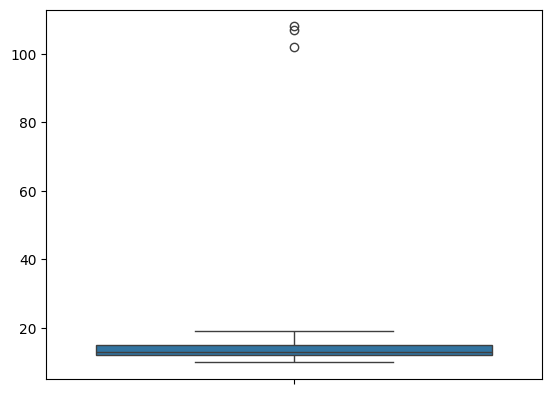

In [103]:
sns.boxplot(data)

In [110]:
# 8. Remove outliers
for i in data:
    if i in outliers:
        data.remove(i)


In [111]:
data


[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]

<Axes: >

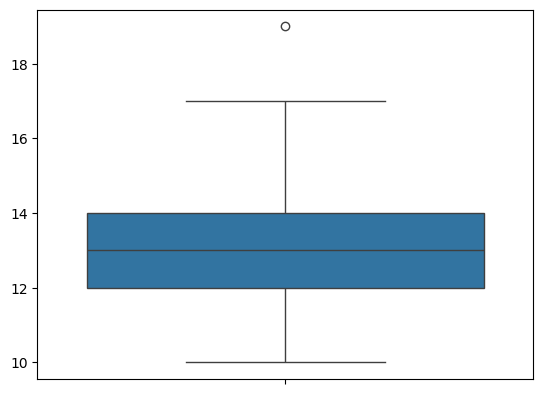

In [113]:
sns.boxplot(data)

# 5 Number Summary

1. Minimum
2. Q1
3. Median
4. Q3
5. Maximum

In [112]:
# 1. minimum value of the data
min = np.min(data)
min


10

In [84]:
# 2. Q1
q1 =np.percentile(data,25)
q1

12.0

In [85]:
# 3. median
median = stats.median(data)
median

13

In [86]:
#  4. Q3
q3 = np.percentile(data,75)
q3

14.0

In [87]:
# 5. Maximum value
max = np.max(data)
max

19

In [88]:
#  Five Number Summary is: 
print("Minimum value is: ", min)
print("First quartile is: ", q1)
print("Median is: ", median)
print("Third quartile is: ", q3)
print("Maximum value is: ", max)


Minimum value is:  10
First quartile is:  12.0
Median is:  13
Third quartile is:  14.0
Maximum value is:  19
